In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Python/GB Четвертная работа/total_data.csv')

In [4]:
data.head()

,request_id,age,spoke_with_agent,documents_send,documents_recieved,flag,delivery_pickup,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3,user_type
0,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,not_stated,0.0,1.0,1,0,0,0,0,new
1,853b5d24c44a1bd3255c679fe10ae1fd,45,0,0,0,0,delivery,171.0,0.0,1,0,1,0,0,old
2,7ae319b1bd27ca5eaf622a9421a3014d,31,1,0,0,0,pickup,40.0,0.0,1,0,0,0,0,new
3,06993ceab2ede613bce365880572460c,23,1,0,0,0,pickup,229.0,0.0,2,1,2,0,0,new
4,d9bf61f493e7e37df134a2e1284ccd00,29,1,0,0,0,pickup,152.0,0.0,1,1,0,0,0,old


In [5]:
data = data.drop(['request_id'],axis=1)

In [6]:
data.shape

(8471, 14)

In [7]:
data.dtypes

age                     int64
spoke_with_agent        int64
documents_send          int64
documents_recieved      int64
flag                    int64
delivery_pickup        object
session_duration      float64
bounce_rate           float64
sessions                int64
visited_partners        int64
step_1                  int64
step_2                  int64
step_3                  int64
user_type              object
dtype: object

In [8]:
data.isna().sum()

age                   0
spoke_with_agent      0
documents_send        0
documents_recieved    0
flag                  0
delivery_pickup       0
session_duration      0
bounce_rate           0
sessions              0
visited_partners      0
step_1                0
step_2                0
step_3                0
user_type             0
dtype: int64

In [9]:
data.describe()

,age,spoke_with_agent,documents_send,documents_recieved,flag,session_duration,bounce_rate,sessions,visited_partners,step_1,step_2,step_3
count,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000,8471.000000
mean,32.738992,0.648566,0.212017,0.080274,0.080864,262.230814,0.085194,1.214615,0.028686,0.841341,0.065163,0.237162
std,9.429812,0.477446,0.408761,0.271733,0.272642,314.366181,0.265456,0.600259,0.166933,0.746718,0.247784,0.429511
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,78.166667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,0.000000,0.000000,0.000000,158.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,38.000000,1.000000,0.000000,0.000000,0.000000,323.200000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,83.000000,1.000000,1.000000,1.000000,1.000000,3364.000000,1.000000,14.000000,1.000000,6.000000,2.000000,3.000000


In [10]:
enc = OrdinalEncoder()
enc.fit(data[['delivery_pickup','user_type']])
data[['delivery_pickup','user_type']] = enc.transform(data[['delivery_pickup','user_type']])

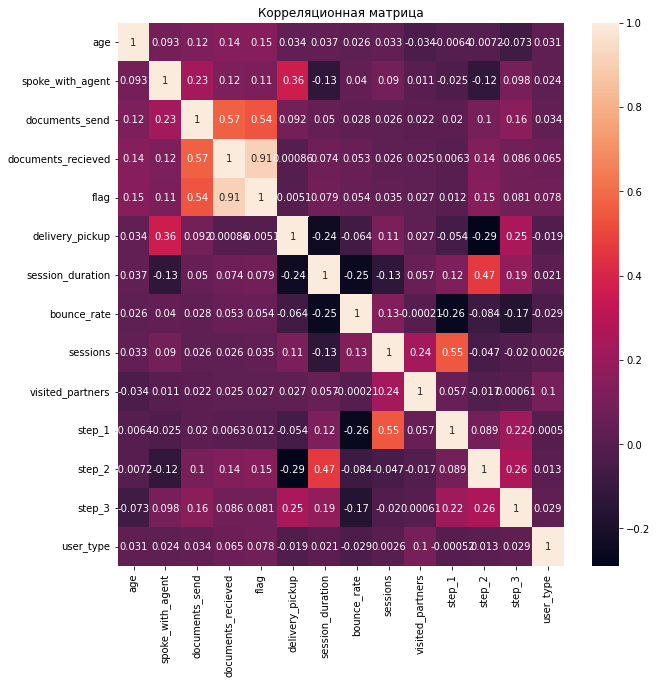

In [11]:
corr_m = data.corr()
plt.figure(figsize = (10, 10))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

В связи с очень высокой корреляцией между целевой переменной flag и переменной documents_received,а также достаточно высокой корреляцией между переменными documents_received/documents_send и sessions/step_1, для построения модели не будут использованы: documents_received, documents_send, sessions.

In [22]:
import warnings
warnings.filterwarnings('ignore')

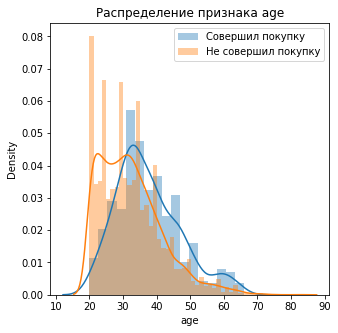

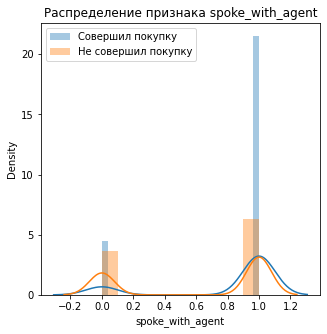

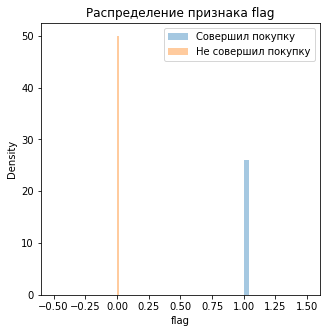

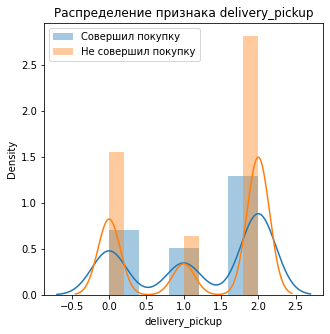

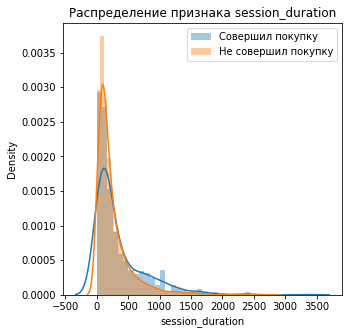

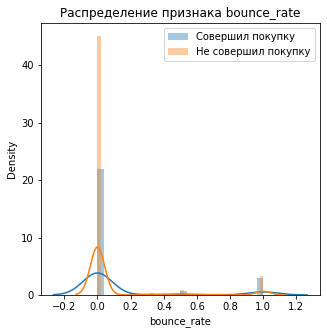

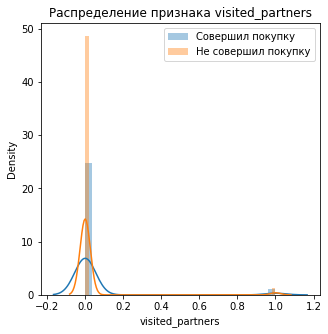

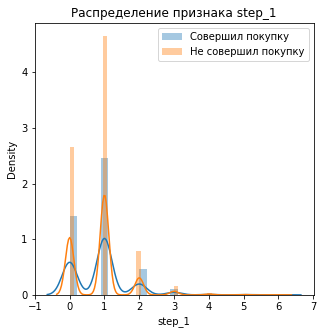

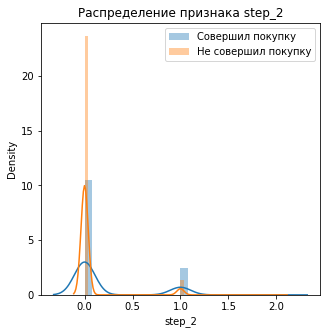

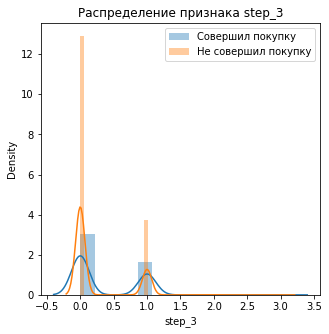

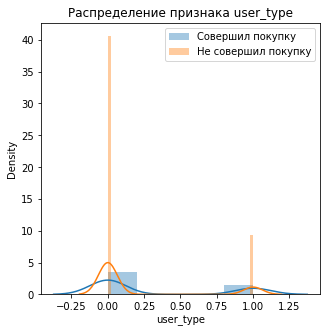

In [23]:
purchase = data[data['flag'] == 1]
no_purchase = data[data['flag'] == 0]


for column in data:
    plt.figure(figsize = (5, 5))
    plt.title(f'Распределение признака {column}')
    sns.distplot(purchase[column], label = 'Совершил покупку')
    sns.distplot(no_purchase[column], label = 'Не совершил покупку')   
    plt.legend()

In [14]:
data = data.drop(['documents_send','documents_recieved','sessions'],axis=1)
X = data.drop(['flag'],axis=1)
y = data.flag

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [17]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [18]:
#Логистическая регрессия

log_reg = LogisticRegression(max_iter = 1000, random_state = 42)
log_reg.fit(X_train_sc, y_train)
print('roc_auc score:', roc_auc_score(y_test,log_reg.predict_proba(X_test_sc)[:, 1])) 

roc_auc score: 0.7572233009708738


In [19]:
pd.DataFrame(log_reg.coef_.T, list(X)).sort_values(0,ascending=False)

,0
spoke_with_agent,0.583186
age,0.469872
step_2,0.375898
bounce_rate,0.274190
user_type,0.239931
step_3,0.217549
session_duration,0.103051
visited_partners,0.041997
step_1,0.003404
delivery_pickup,-0.017173


In [20]:
#Decision Tree
from sklearn.metrics import make_scorer
scorer = make_scorer(roc_auc_score, needs_proba=True)
clf = DecisionTreeClassifier()
params = {'max_depth': range(1,15),'min_samples_split': range(2,15),'min_samples_leaf': range(1,15)}
search = GridSearchCV(clf,params,cv=5,scoring=scorer)
search.fit(X_train,y_train)
best_tree = search.best_estimator_
print('roc_auc score:', search.best_score_)

roc_auc score: 0.7462760095447554


In [21]:
feature_importances = best_tree.feature_importances_
feature_importances_df = pd.DataFrame({'feature':list(X), 'feature_importance':feature_importances})
feature_importances_df.sort_values('feature_importance',ascending=False)

,feature,feature_importance
0,age,0.367853
7,step_2,0.236884
1,spoke_with_agent,0.173505
9,user_type,0.076472
3,session_duration,0.054016
4,bounce_rate,0.038138
8,step_3,0.025677
2,delivery_pickup,0.020927
6,step_1,0.006530
5,visited_partners,0.000000


Результаты моделей незначительно отличаются друг от друга, однако Логистическая регрессия с большей точностью предсказывает попадание целевой переменной в одну из категорий. В топ-3 наиболее значимых переменных, связанных с совершением покупки, у обеих моделей вошли: возраст клиента, говорил ли он с оператором и дошел ли до второго шага заполнения анкеты. В дальнейшем эту информацию можно использовать для стимулирования клиента на покупку (например, активнее напоминать об анкете,если пользователь остановился на шаге 1) и привлечения клиентов из наиболее привлекательной возрастной категории. 